<a href="https://colab.research.google.com/github/alfanashfak2001/Machine-learning-projects/blob/main/Student_performence__analysis_%2Clinear_regression_and_logistic_regression_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.datasets import load_iris
from matplotlib.colors import ListedColormap
from sklearn.decomposition import PCA

In [ ]:
# Load the dataset
df=pd.read_csv("student-por.csv")

In [ ]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


In [ ]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [ ]:
df.tail()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10
648,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,4,10,11,11


In [ ]:
df.shape

(649, 33)

In [ ]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [ ]:
empty_columns = df.columns[df.isnull().all()]
empty_columns

Index([], dtype='object')

In [ ]:
# Check for empty columns (columns with all NaN/missing values)
empty_columns = df.columns[df.isnull().all()]
if len(empty_columns) > 0:
    print("Empty columns:", empty_columns)
else:
    print("No empty columns found.")

No empty columns found.


In [ ]:
# Check for null values in the dataset
null_counts = df.isnull().sum()
null_columns = null_counts[null_counts > 0]
if len(null_columns) > 0:
    print("Columns with null values:")
    print(null_columns)
else:
    print("No columns with null values found.")

No columns with null values found.


# No empty column so we are good to go

In [ ]:
def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
    figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
    plt.figure(figsize=figsize)
    sns.violinplot(data=df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
    sns.despine(top=True, right=True, bottom=True, left=True)
    plt.show()

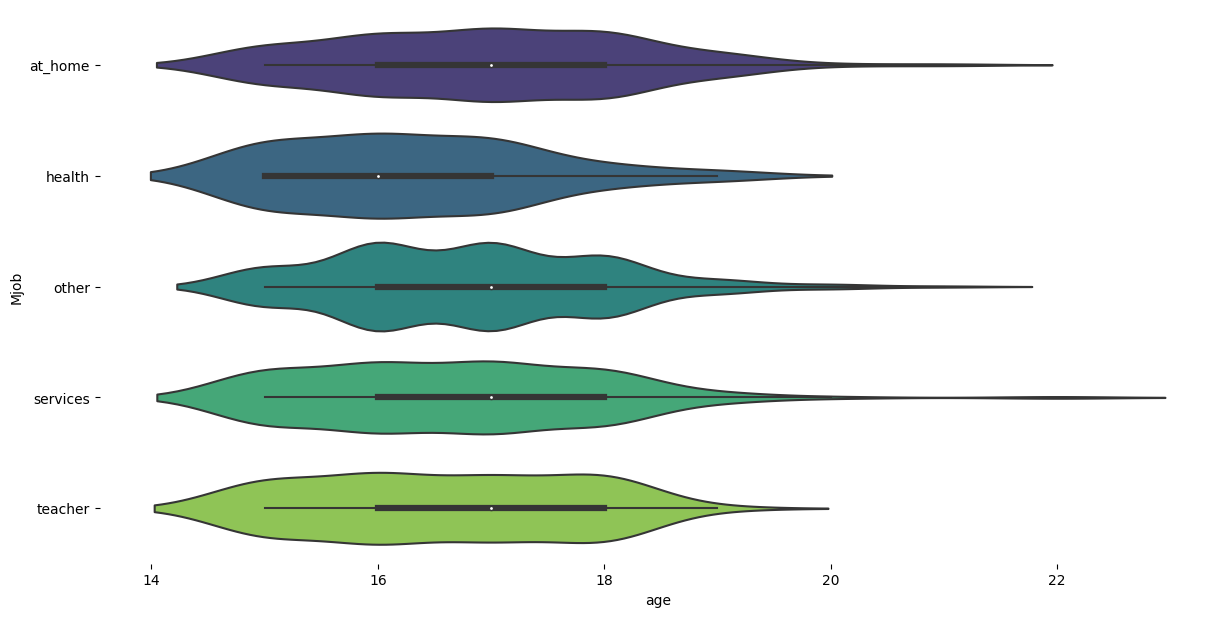

In [ ]:
violin_plot(df, value_colname='age', facet_colname='Mjob', figscale=1.2, mpl_palette_name='viridis')


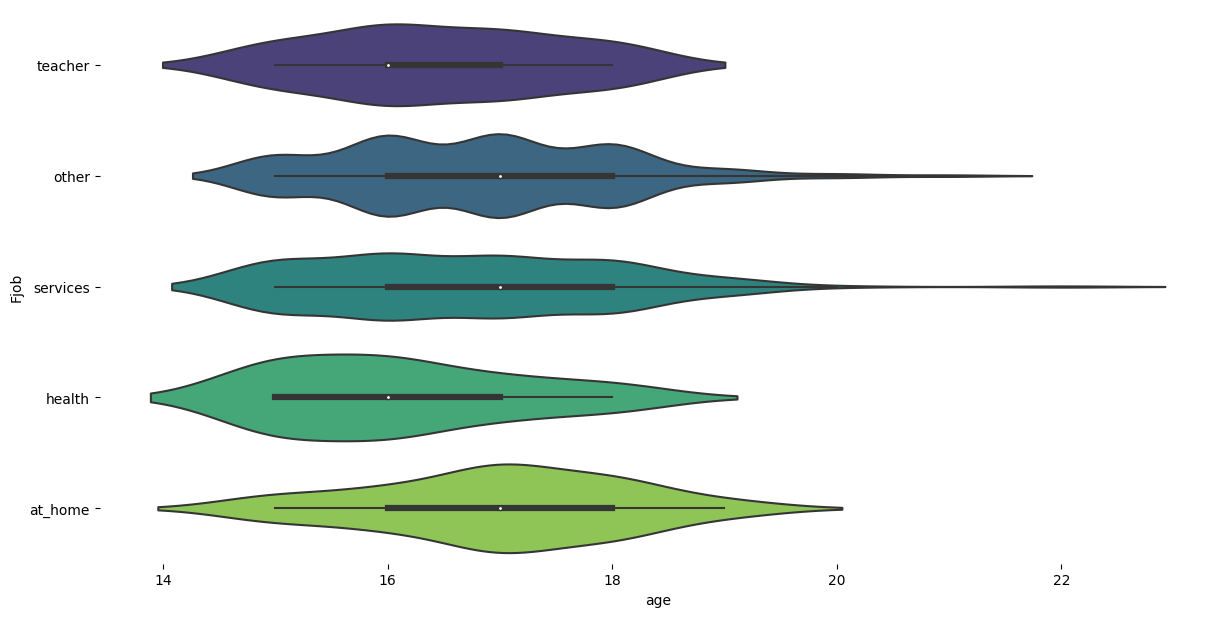

In [ ]:
violin_plot(df, value_colname='age', facet_colname='Fjob', figscale=1.2, mpl_palette_name='viridis')


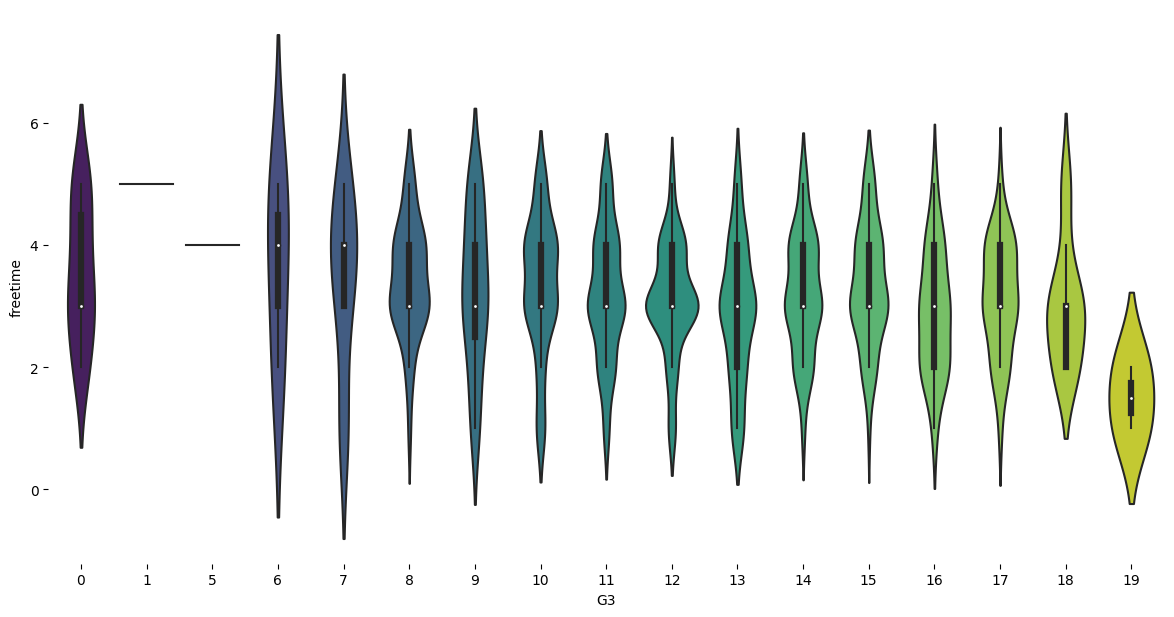

In [ ]:
violin_plot(df, value_colname='G3', facet_colname='freetime', figscale=1.2, mpl_palette_name='viridis')


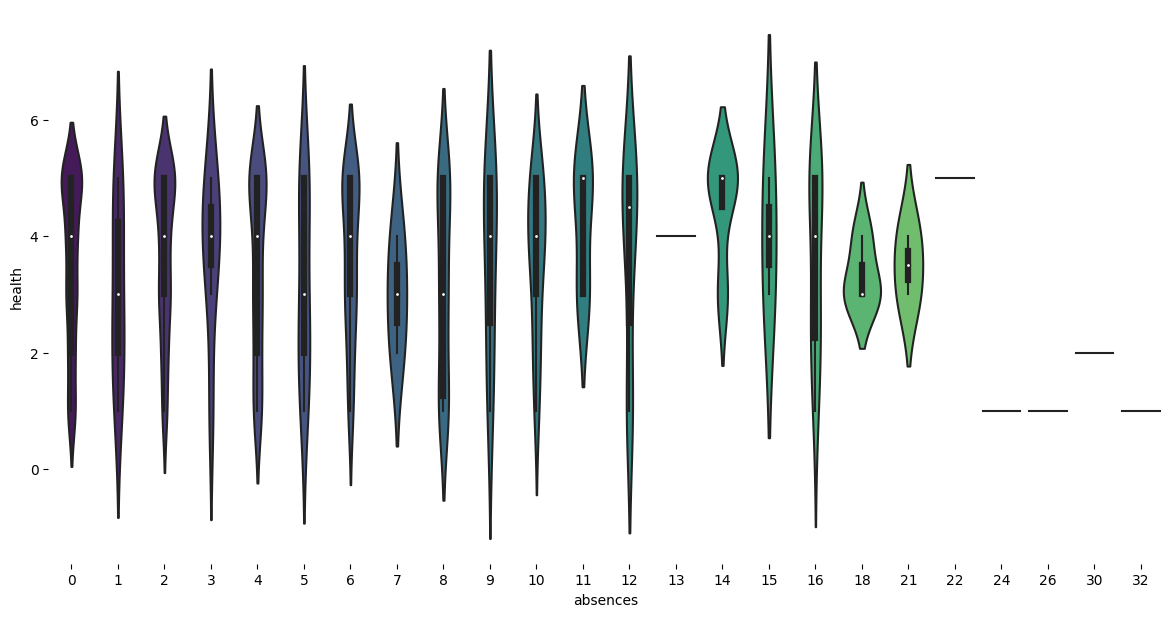

In [ ]:
violin_plot(df, value_colname='absences', facet_colname='health', figscale=1.2, mpl_palette_name='viridis')


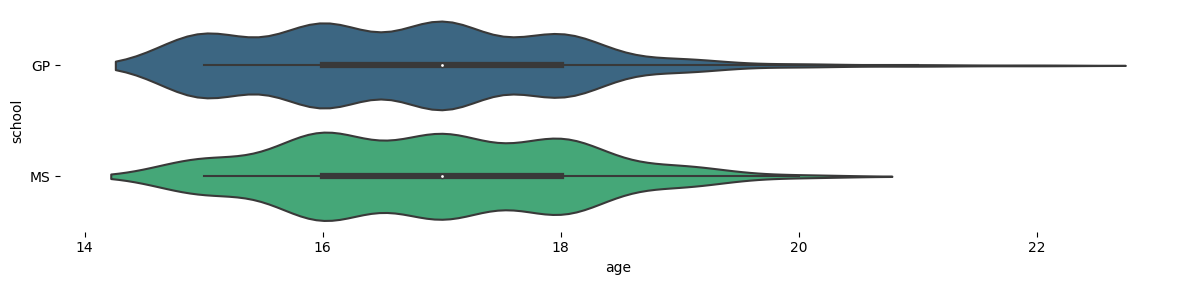

In [ ]:
violin_plot(df, value_colname='age', facet_colname='school', figscale=1.2, mpl_palette_name='viridis')


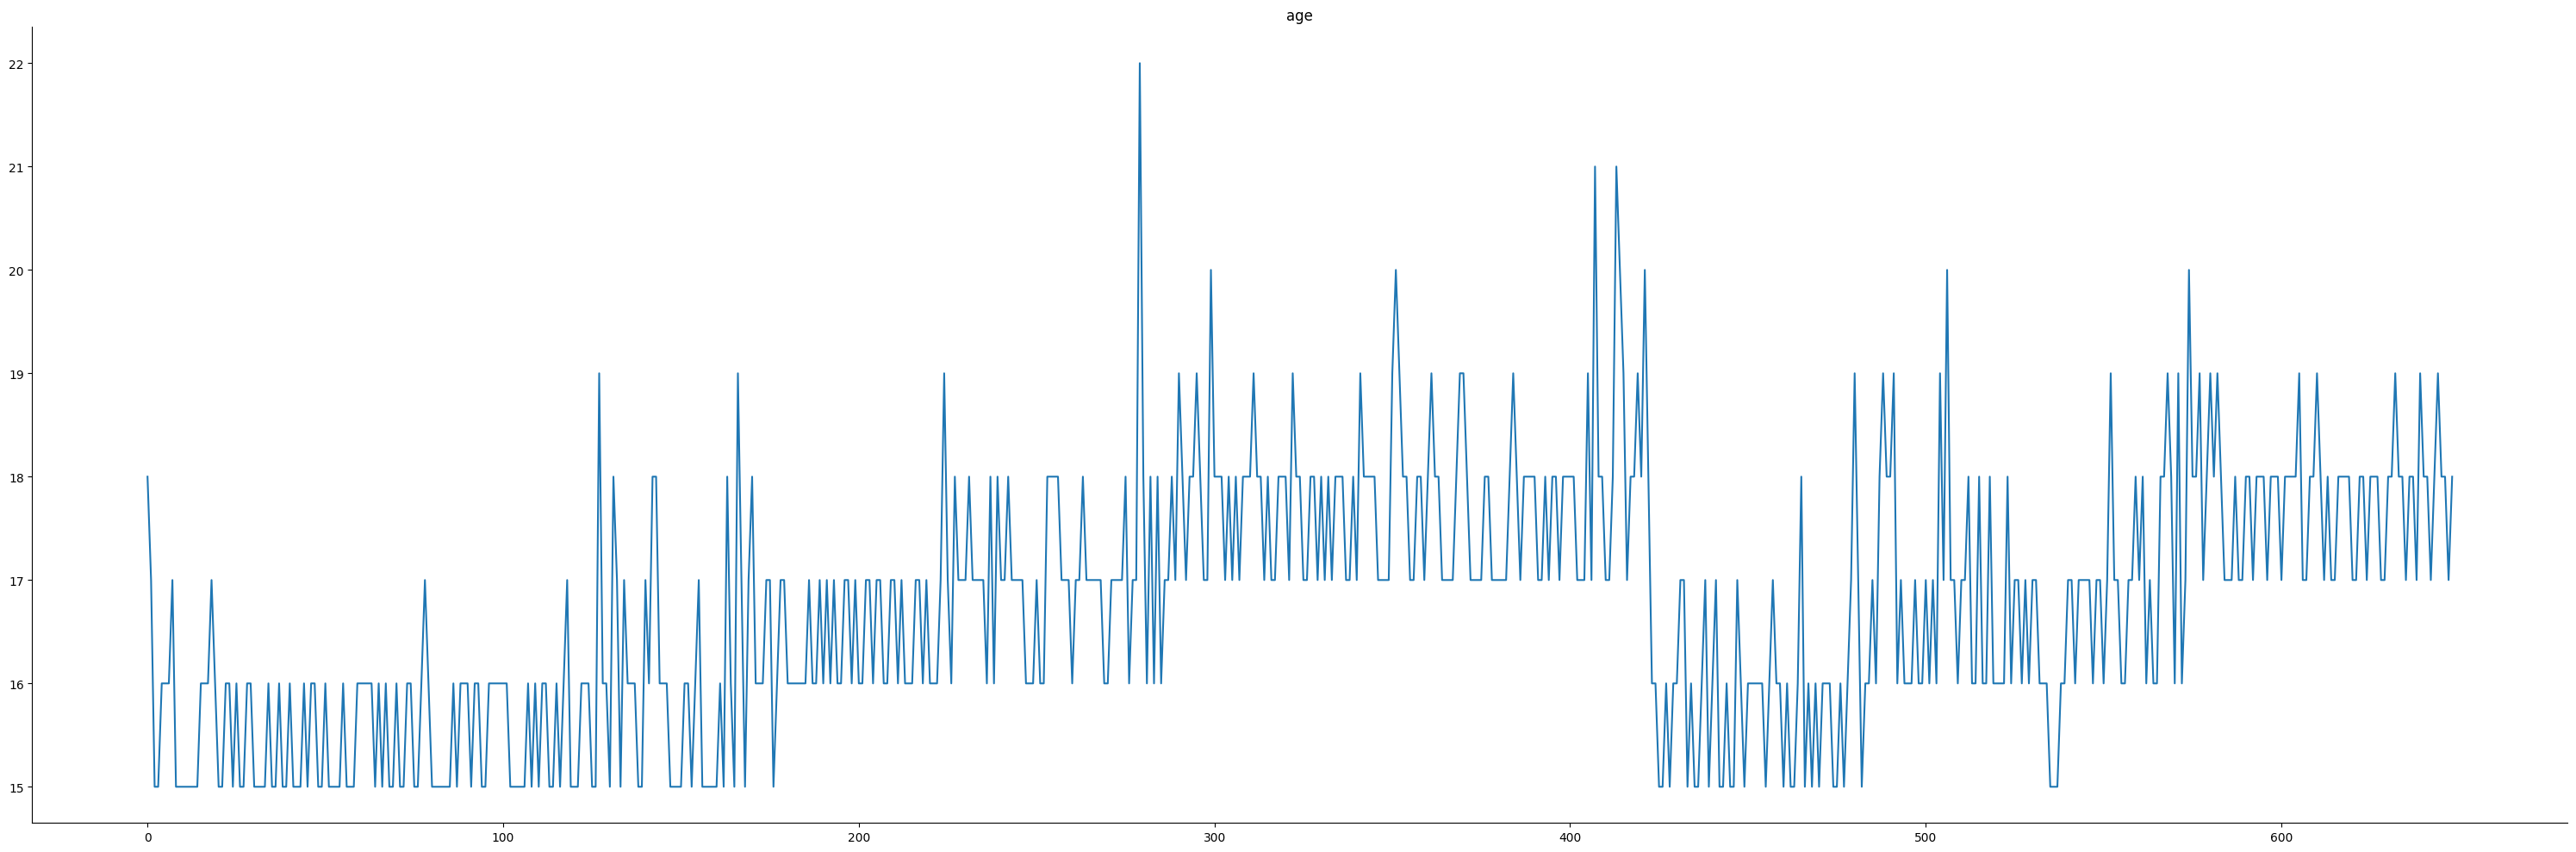

In [ ]:
def value_plot(df, y):
    plt.figure(figsize=(30, 10))
    df[y].plot(kind='line')
    plt.title(y)
    plt.gca().spines[['top', 'right']].set_visible(False)
    plt.tight_layout()
    plt.show()

value_plot(df, y='age')


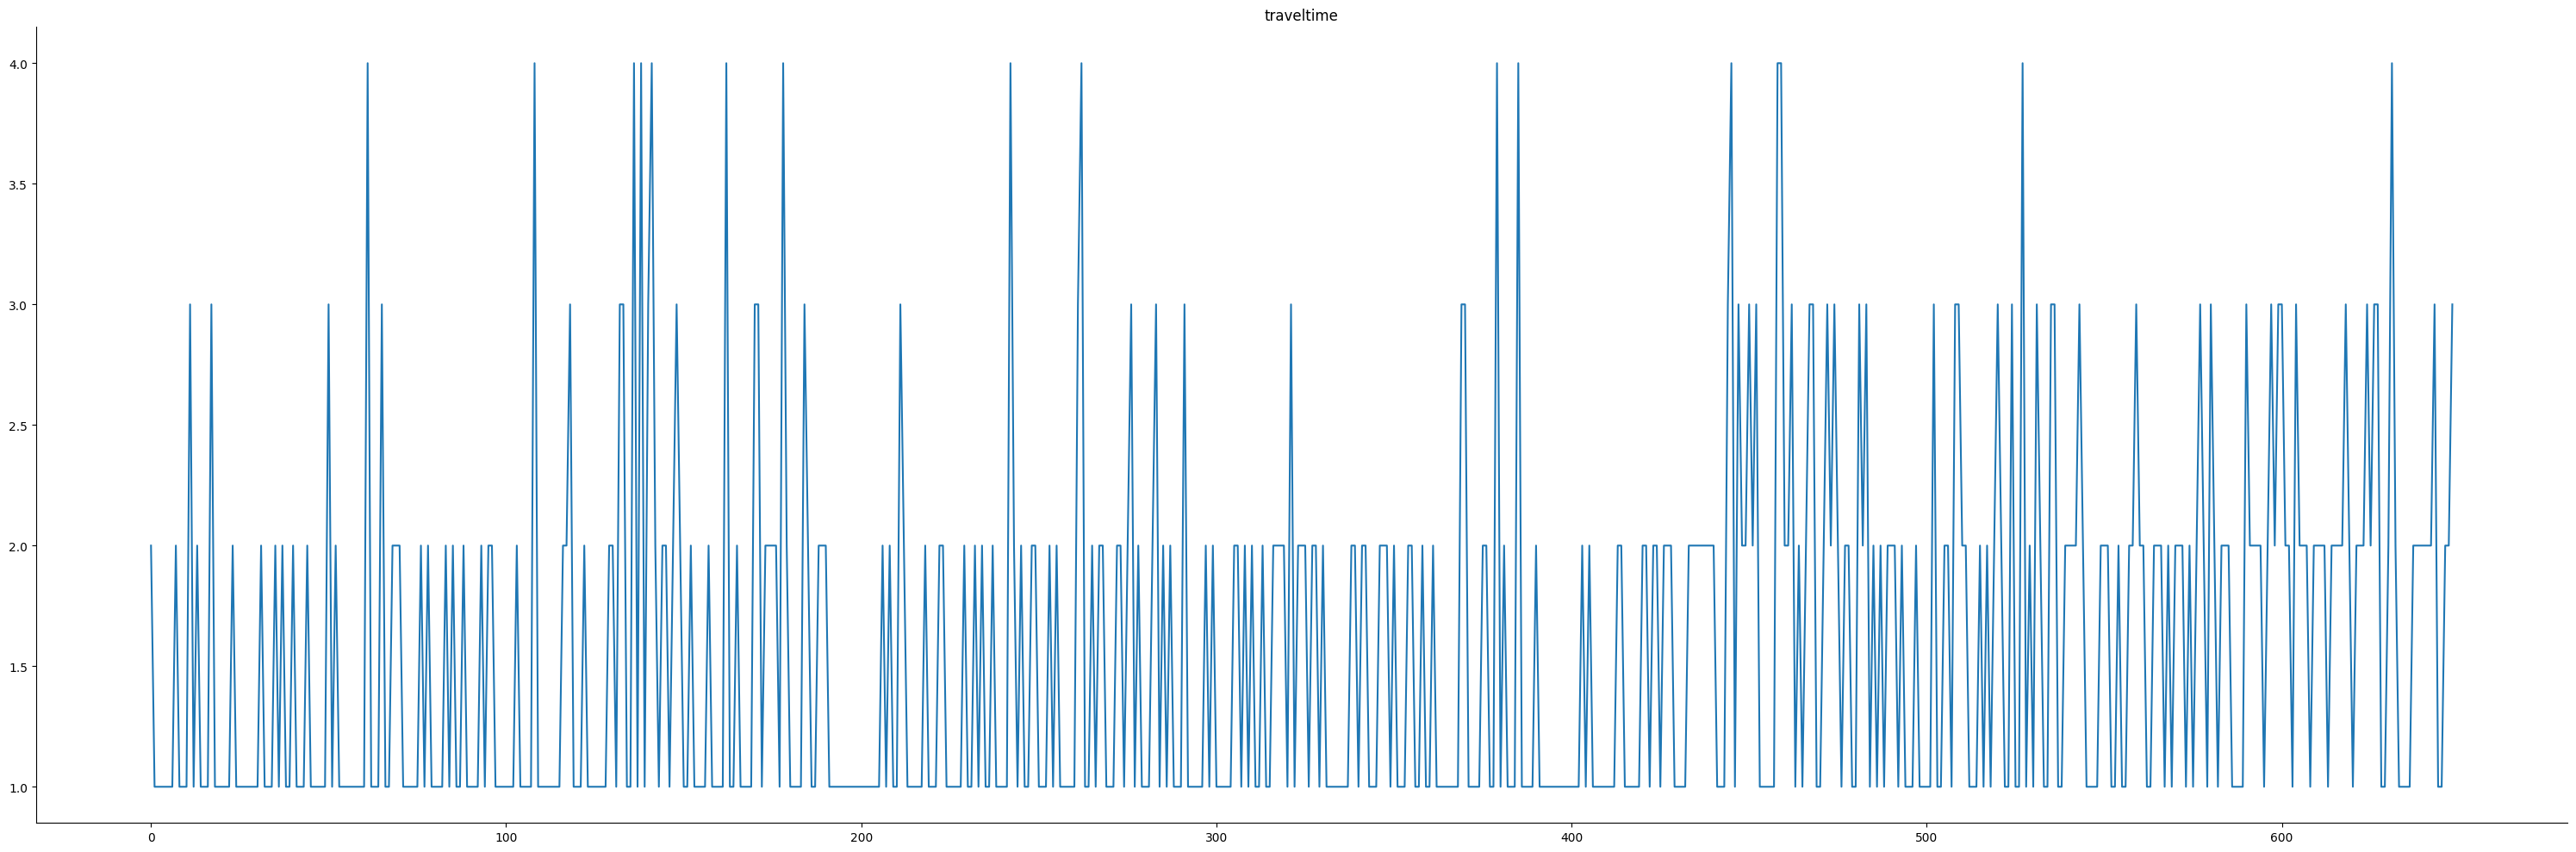

In [ ]:
value_plot(df, y='traveltime')

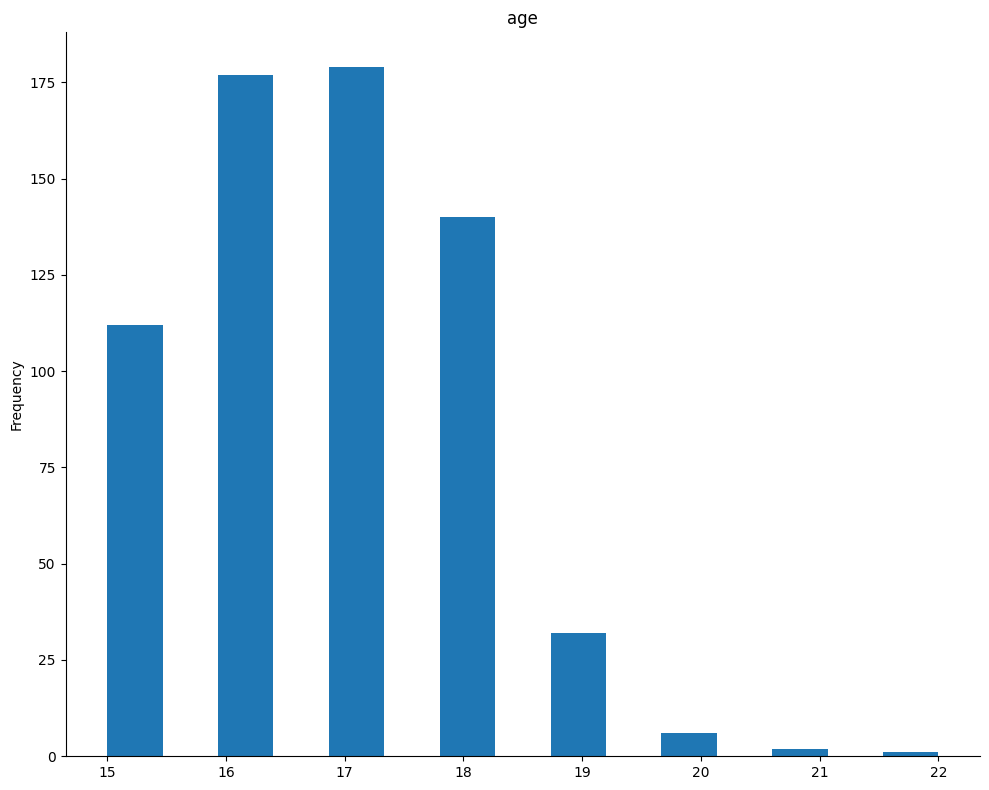

In [ ]:
def histogram(df, colname, num_bins=20):
    plt.figure(figsize=(10,8))
    df[colname].plot(kind='hist', bins=num_bins, title=colname)
    plt.gca().spines[['top', 'right']].set_visible(False)
    plt.tight_layout()
    plt.show()
histogram(df, colname='age', num_bins=15)


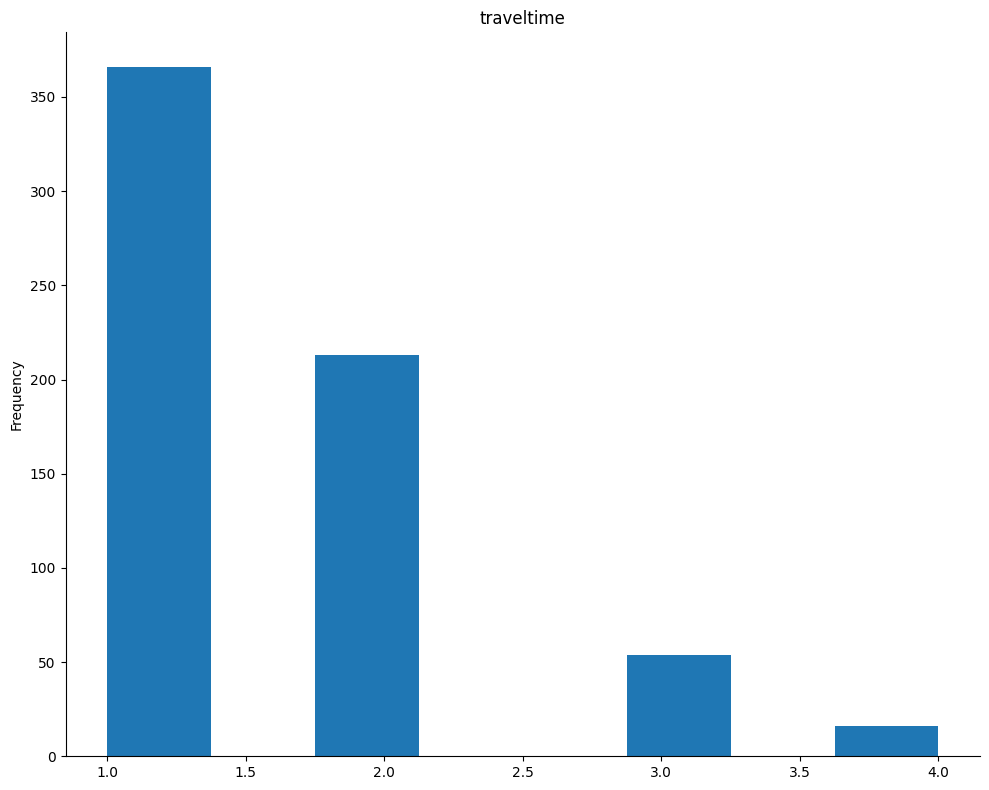

In [ ]:
histogram(df, colname='traveltime', num_bins=8)


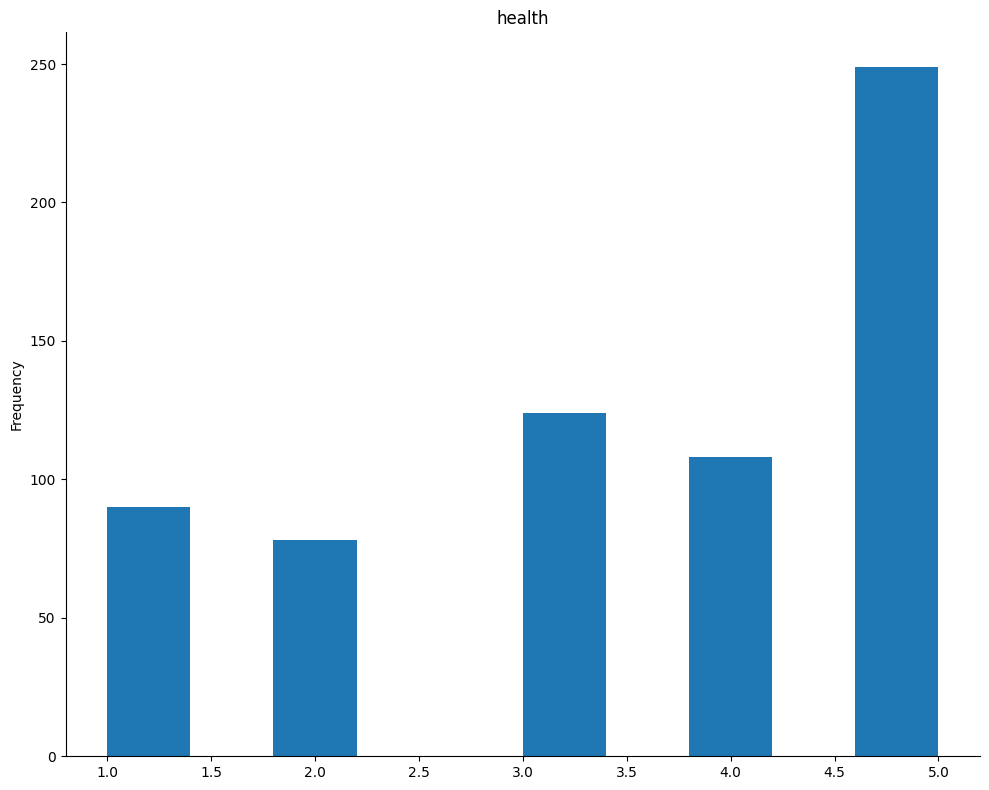

In [ ]:
histogram(df, colname='health', num_bins=10)


In [ ]:
##print those all plots in one frame
# histogram(df, colname='age', num_bins=15, figscale=1.2)
# histogram(df, colname='health', num_bins=10, figscale=1.2)
# histogram(df, colname='traveltime', num_bins=8, figscale=1.2)

# plt.tight_layout()
# plt.show()

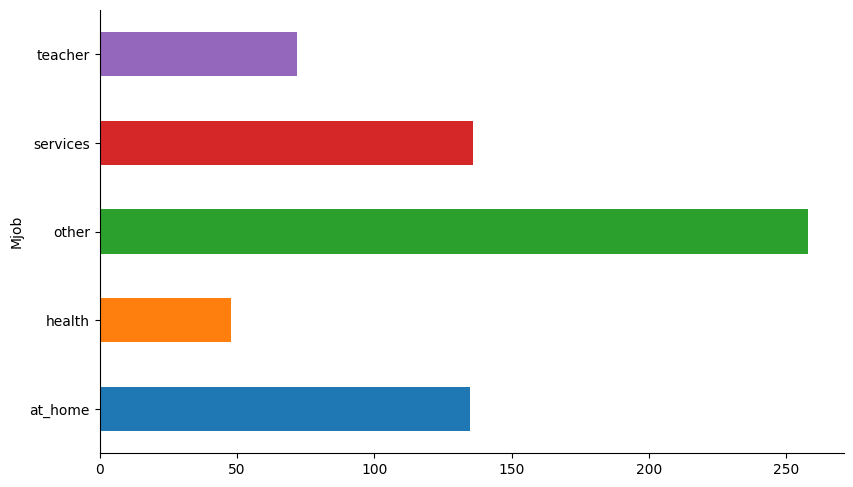

In [ ]:

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
    plt.figure(figsize=(8 * figscale, 4.8 * figscale))
    sns.color_palette(mpl_palette_name)
    df.groupby(colname).size().plot(kind='barh', color=sns.color_palette(), figsize=(8 * figscale, 4.8 * figscale))
    plt.gca().spines[['top', 'right']].set_visible(False)
    plt.show()


categorical_histogram(df, colname='Mjob', figscale=1.2, mpl_palette_name='coolwarm')


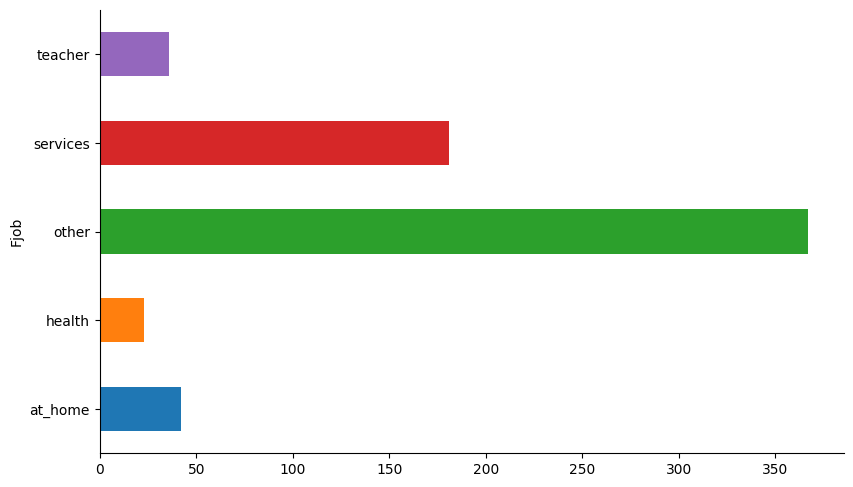

In [ ]:
categorical_histogram(df, colname='Fjob', figscale=1.2, mpl_palette_name='coolwarm')


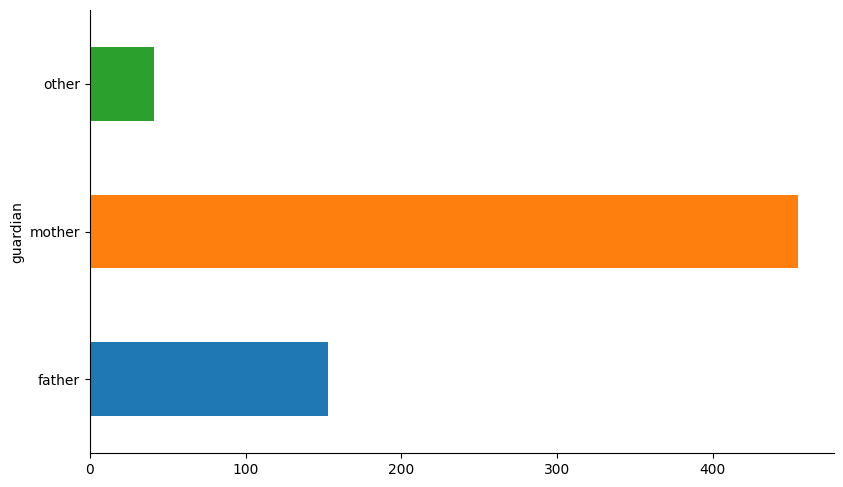

In [ ]:
categorical_histogram(df, colname='guardian', figscale=1.2, mpl_palette_name='coolwarm')


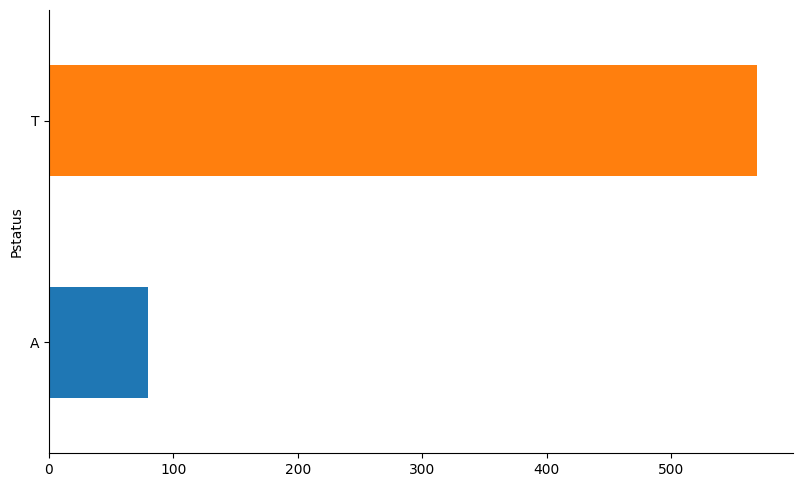

In [ ]:
categorical_histogram(df, colname='Pstatus', figscale=1.2, mpl_palette_name='coolwarm')


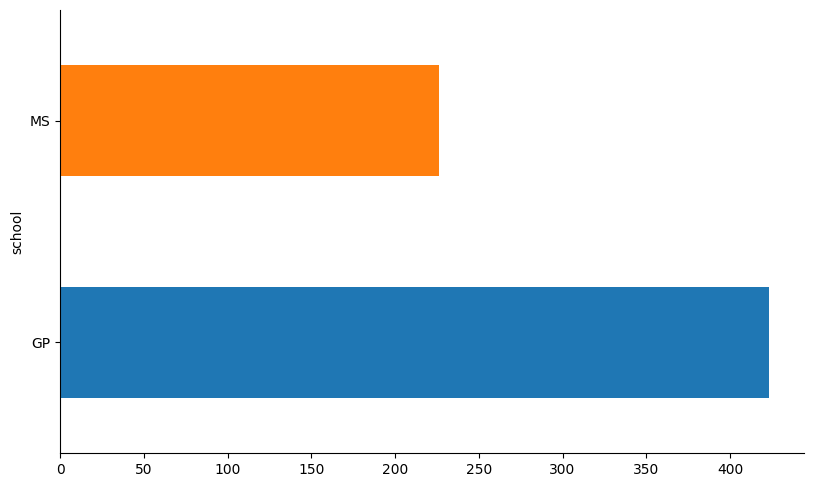

In [ ]:
categorical_histogram(df, colname='school', figscale=1.2, mpl_palette_name='coolwarm')


In [ ]:
# ##print those all plots in one frame

# categorical_histogram(df, colname='school', figscale=1.2, mpl_palette_name='coolwarm')
# categorical_histogram(df, colname='Pstatus', figscale=1.2, mpl_palette_name='coolwarm')
# categorical_histogram(df, colname='guardian', figscale=1.2, mpl_palette_name='coolwarm')
# categorical_histogram(df, colname='Fjob', figscale=1.2, mpl_palette_name='coolwarm')
# categorical_histogram(df, colname='Mjob', figscale=1.2, mpl_palette_name='coolwarm')

# plt.tight_layout()
# plt.show()

# Here we are gonna predict the final score of the student using linear regression

# 1.Encode the columns

In [ ]:
columns_to_encode = ['school', 'sex', 'address','famsize','Pstatus','Mjob','Fjob','reason','guardian','schoolsup','famsup','paid','activities','nursery','higher','internet','romantic']

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Loop through each column and perform label encoding
for column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column])

In [ ]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,0,4,...,4,3,4,1,1,3,4,0,11,11
1,0,0,17,1,0,1,1,1,0,2,...,5,3,3,1,1,3,2,9,11,11
2,0,0,15,1,1,1,1,1,0,2,...,4,3,2,2,3,3,6,12,13,12
3,0,0,15,1,0,1,4,2,1,3,...,3,2,2,1,1,5,0,14,14,14
4,0,0,16,1,0,1,3,3,2,2,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,1,0,19,0,0,1,2,3,3,2,...,5,4,2,1,2,5,4,10,11,10
645,1,0,18,1,1,1,3,1,4,3,...,4,3,4,1,1,1,4,15,15,16
646,1,0,18,1,0,1,1,1,2,2,...,1,1,1,1,1,5,6,11,12,9
647,1,1,17,1,1,1,3,1,3,3,...,2,4,5,3,4,2,6,10,10,10


# Corealtion between the variable

<ipython-input-105-42eb5dd7804c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.head().corr()


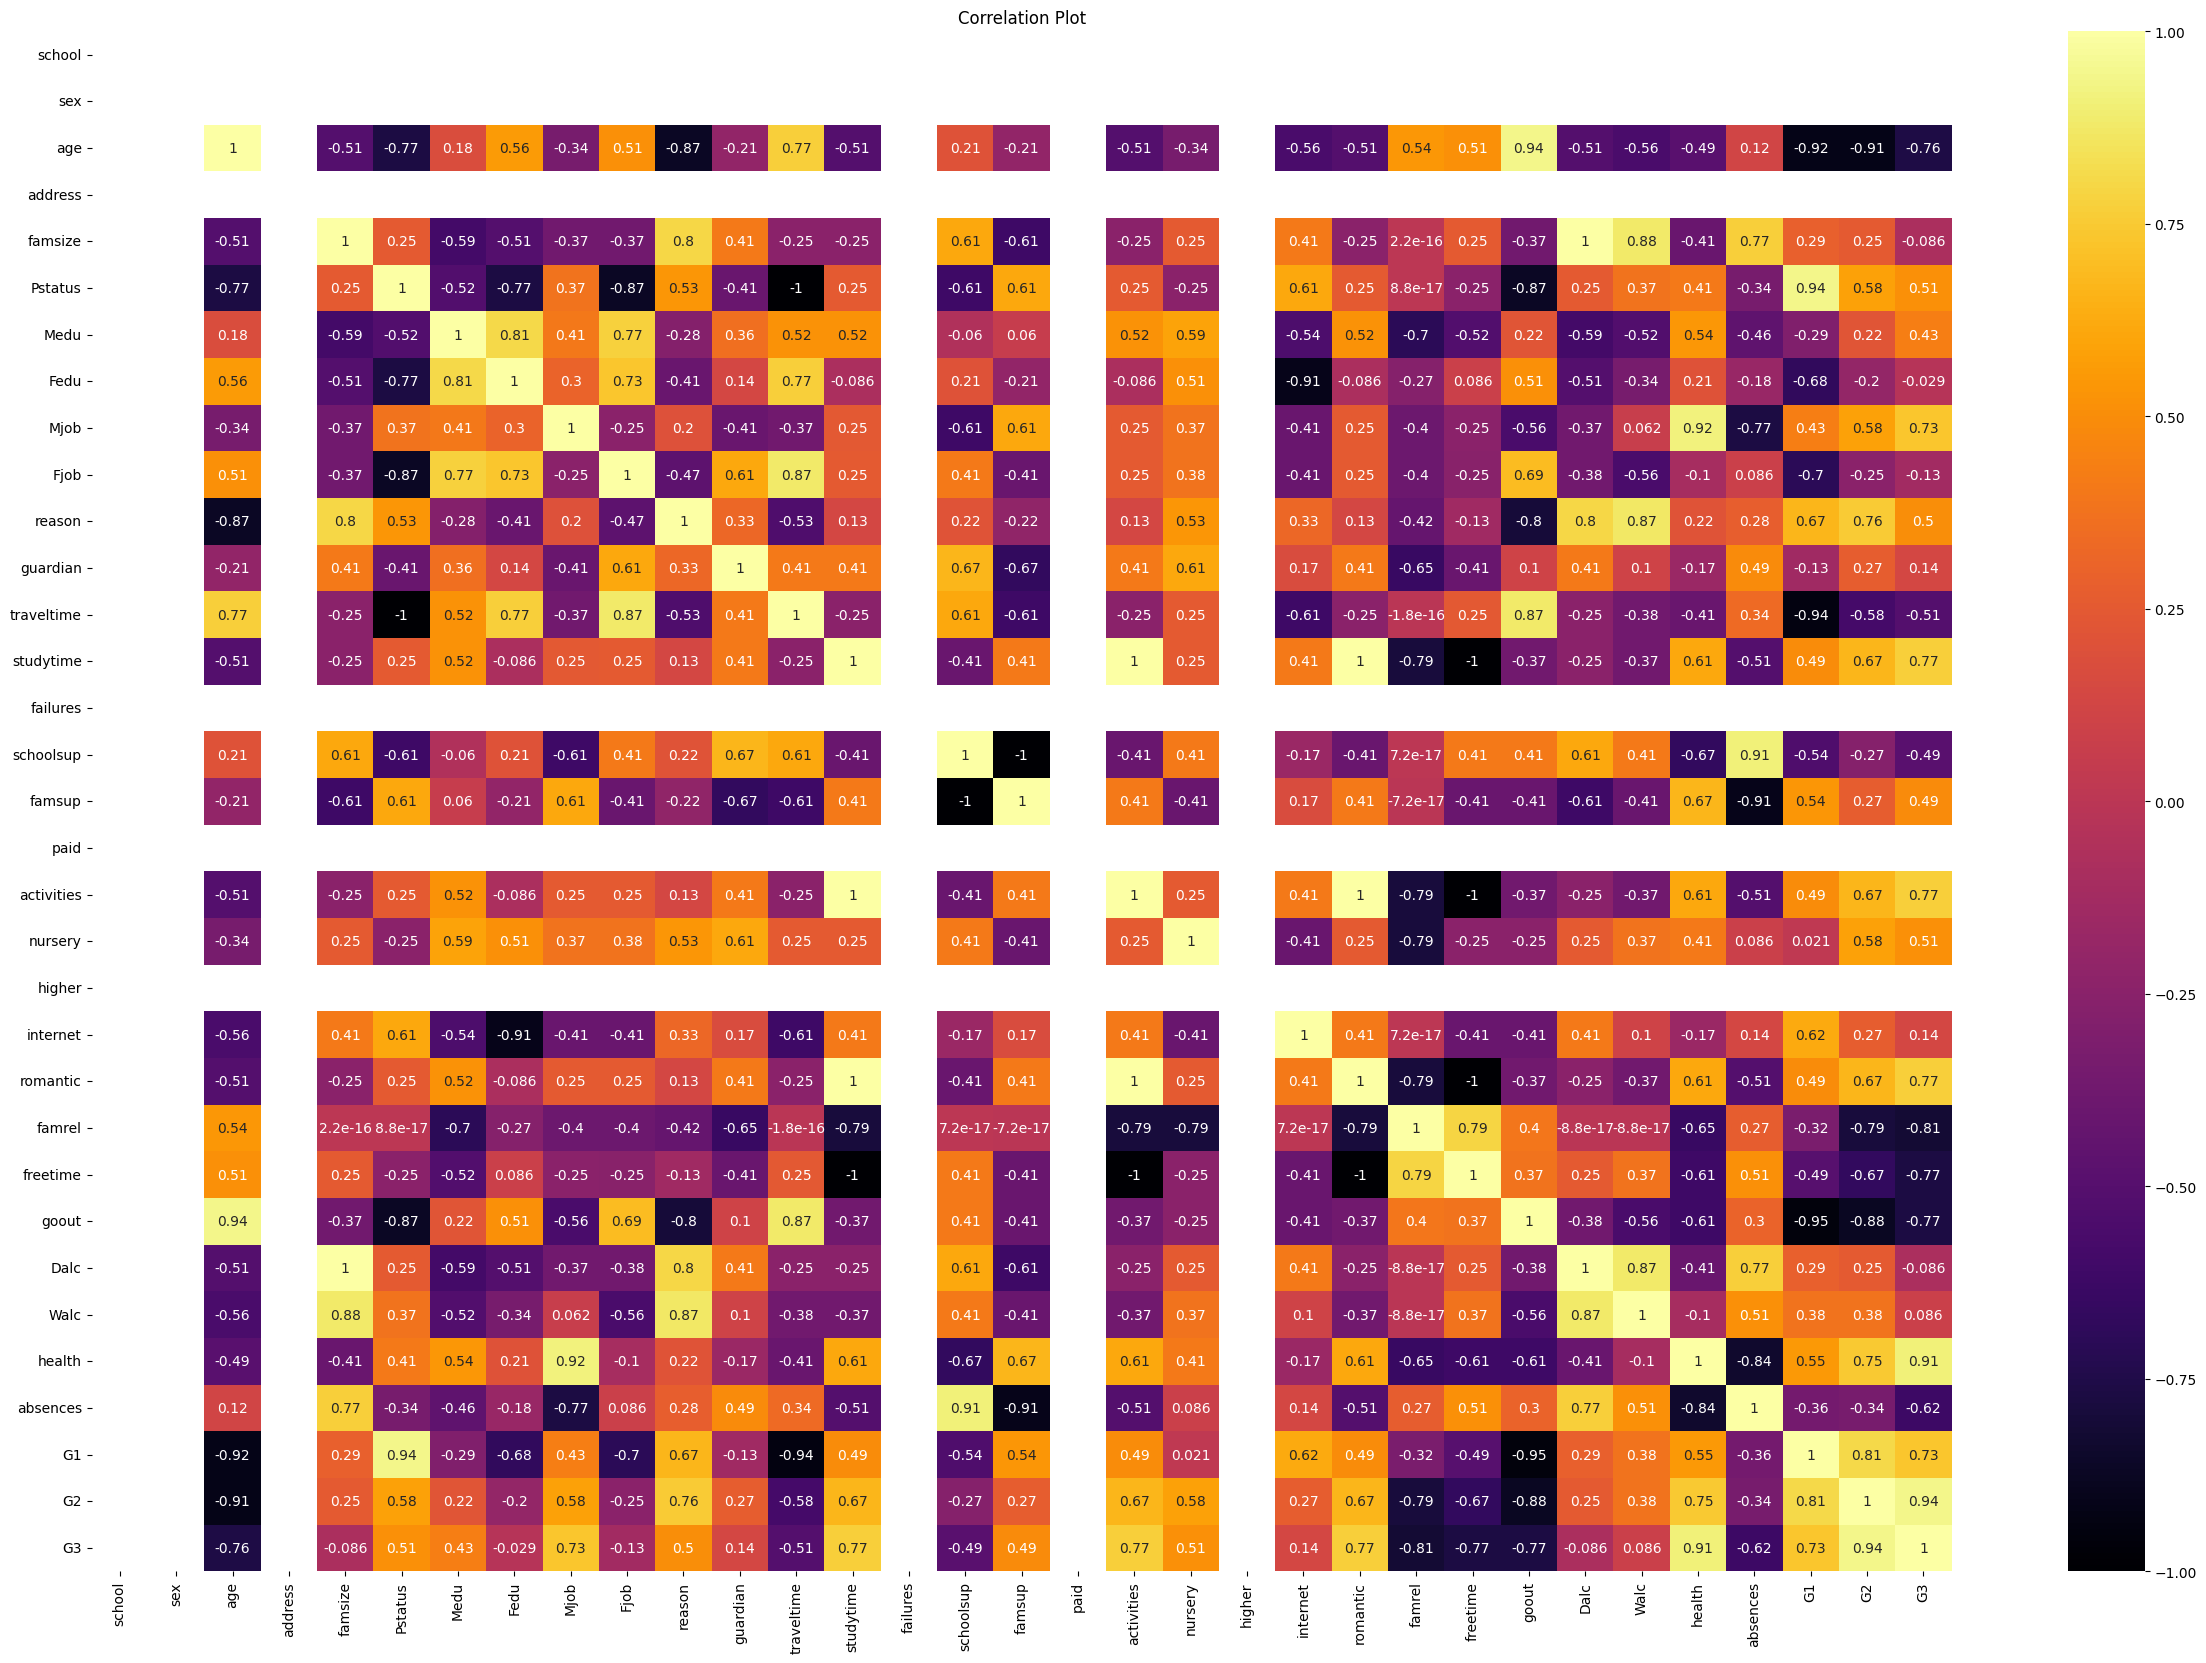

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df.head().corr()

# Create the correlation plot using seaborn
plt.figure(figsize=(30, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='inferno', vmin=-1, vmax=1)
plt.title('Correlation Plot')
plt.show()

# pairplot of the variable of the dataset

In [ ]:
sns.set(style='dark')
sns.pairplot(df)
plt.show()

# first we have to define X and y values

In [ ]:
# Separate features and target
X = df.drop('G3', axis=1)
y = df['G3']

In [ ]:
X

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,0,0,18,1,0,0,4,4,0,4,...,0,4,3,4,1,1,3,4,0,11
1,0,0,17,1,0,1,1,1,0,2,...,0,5,3,3,1,1,3,2,9,11
2,0,0,15,1,1,1,1,1,0,2,...,0,4,3,2,2,3,3,6,12,13
3,0,0,15,1,0,1,4,2,1,3,...,1,3,2,2,1,1,5,0,14,14
4,0,0,16,1,0,1,3,3,2,2,...,0,4,3,2,1,2,5,0,11,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,1,0,19,0,0,1,2,3,3,2,...,0,5,4,2,1,2,5,4,10,11
645,1,0,18,1,1,1,3,1,4,3,...,0,4,3,4,1,1,1,4,15,15
646,1,0,18,1,0,1,1,1,2,2,...,0,1,1,1,1,1,5,6,11,12
647,1,1,17,1,1,1,3,1,3,3,...,0,2,4,5,3,4,2,6,10,10


In [ ]:
y

0      11
1      11
2      12
3      14
4      13
       ..
644    10
645    16
646     9
647    10
648    11
Name: G3, Length: 649, dtype: int64

# Standardize the features to convert the ranges of the data in to same range to reduce the errors


In [ ]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


# Initialize and fit the linear regression model


In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Mean Squared Error: 1.4370937042410001
R-squared: 0.8526317103852279


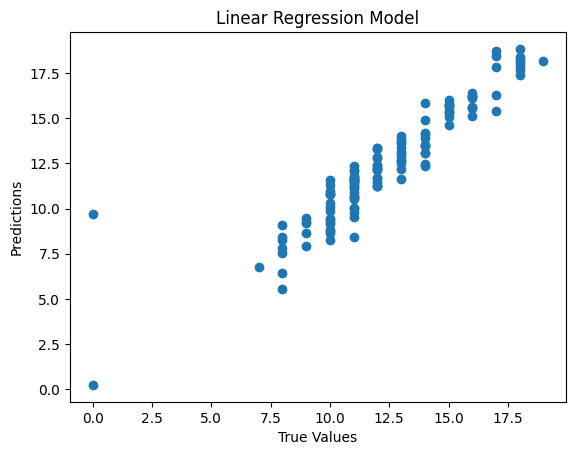

In [ ]:
# Predict on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation report
print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Create a linear regression plot
plt.scatter(y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("Linear Regression Model")
plt.show()

# Here the values are acceptable   


# Mean Squared Error: 1.437093704240999
# R-squared: 0.852631710385228

# Lets  try using the classification system  for that we need the target values as discrete values so first we are gonna convert the final grades in to two categories one is below 10(0) and other one is above ten(1)

In [ ]:
#create a new column named as label by the condition of the g3 column which is the final results of the students
df['Label'] = df['G3'].apply(lambda x: '1' if x > 10 else '0')


# We are going to use logistic regression to do this classification which has sigmoid function as its algorithm to differentiate categories`

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.88      0.86        32
           1       0.96      0.95      0.95        98

    accuracy                           0.93       130
   macro avg       0.90      0.91      0.91       130
weighted avg       0.93      0.93      0.93       130



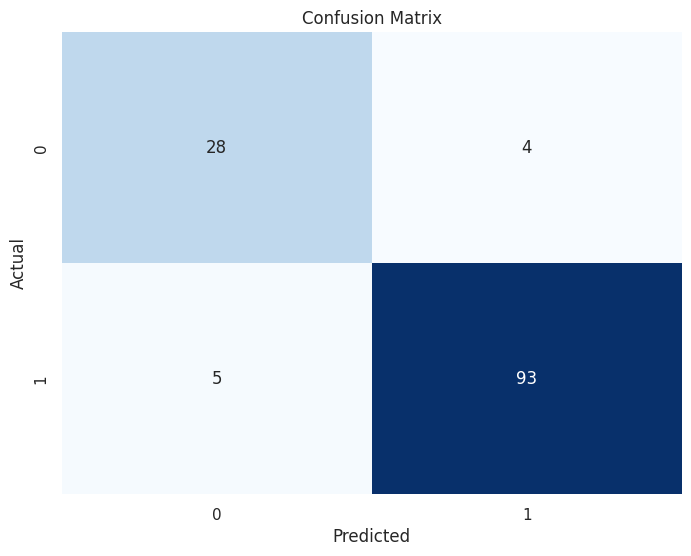

In [ ]:
# Separate features and target but we have already done this before
X = df.drop(['Label','G3'], axis=1)
y = df['Label']



# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression classifier
logreg_classifier = LogisticRegression()
logreg_classifier.fit(X_train, y_train)

# Make predictions
y_pred = logreg_classifier.predict(X_test)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


cm = confusion_matrix(y_test, y_pred)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86        32
           1       0.96      0.95      0.95        98

    accuracy                           0.93       130
   macro avg       0.90      0.91      0.91       130
weighted avg       0.93      0.93      0.93       130



# doing Principal component analysis to get the first two principal components to show up in the plot

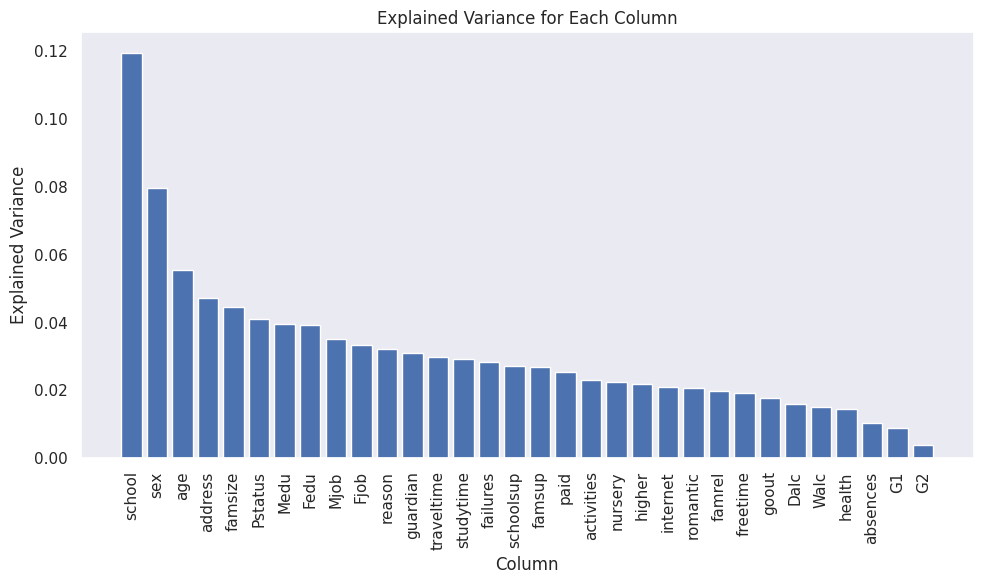

In [ ]:
# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Variance explained by each principal component
explained_variance = pca.explained_variance_ratio_

# Create a DataFrame with explained variance and original column names
explained_variance_df = pd.DataFrame({'Column': X.columns, 'Explained Variance': explained_variance})

# Sort DataFrame by explained variance in descending order
explained_variance_df = explained_variance_df.sort_values(by='Explained Variance', ascending=False)

# Bar plot of explained variance for each principal component
plt.figure(figsize=(10, 6))
plt.bar(explained_variance_df['Column'], explained_variance_df['Explained Variance'])
plt.xlabel('Column')
plt.ylabel('Explained Variance')
plt.title('Explained Variance for Each Column')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

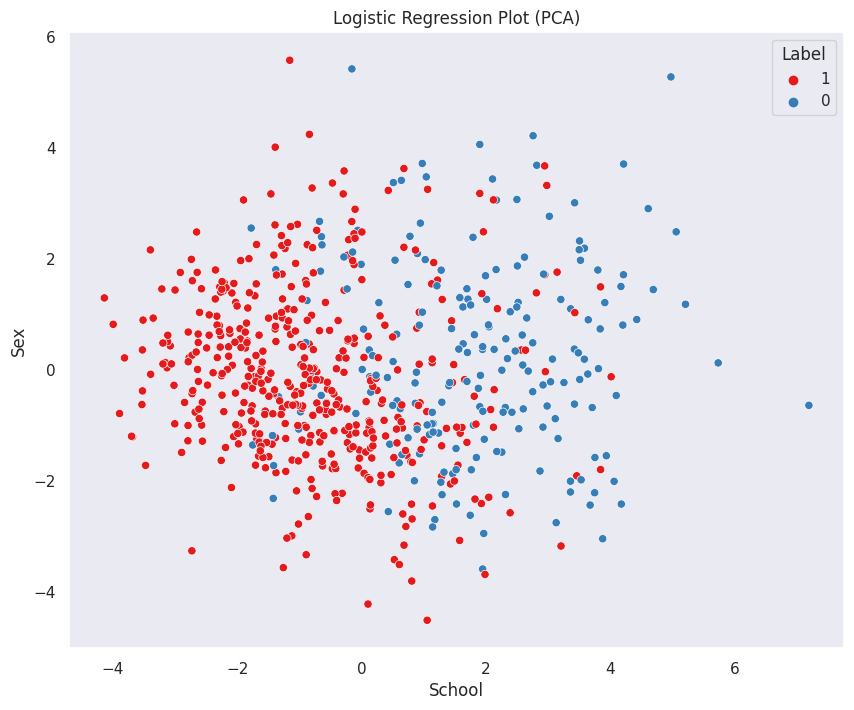

In [ ]:

# Visualize logistic regression plot for the first two principal components
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='Set1')
plt.xlabel('School')
plt.ylabel('Sex')
plt.title('Logistic Regression Plot (PCA)')
plt.legend(title='Label')
plt.show()